## Problem 1: Predicting SalePrice using GrLivArea
Dataset from Kaggle: "House Prices Competition"<br>
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
***
#### Essential Libraries
>NumPy : Library for Numeric Computations in Python<br>
Pandas : Library for Data Acquisition and Preparation<br>
Matplotlib : Low-level library for Data Visualization<br>
Seaborn : Higher-level library for Data Visualization<br>

In [60]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#### Setup Import the Dataset
The dataset is in CSV format; hence we use the `read_csv` function from Pandas.

In [61]:
# import dataset from train
houseData = pd.read_csv('train.csv')

#### Extract the data
Extract the following numeric variables from the dataset, and store as pandas dataframe
>`GrLivArea`  : Above ground living area in SqFt<br>
`SalePrice`  : Sale Price of house in US Dollars

In [62]:
# Extract the numeric variables
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])  #Predictor
houseSalePrice = pd.DataFrame(houseData['SalePrice'])  #Response

**a)** Plot `houseSalePrice` against `houseGrLivArea` using standard jointplot, and note the strong linear relationship. 

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


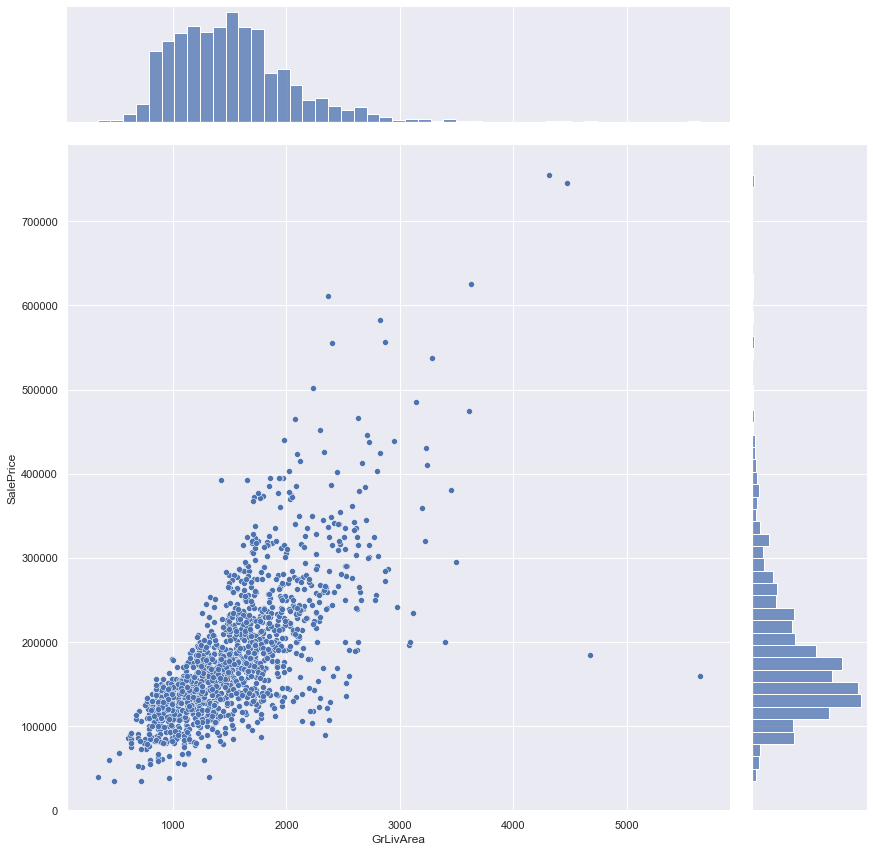

In [63]:
# Create a joint dataframe by concatenating the two variables 
houseDF = pd.concat([houseGrLivArea, houseSalePrice], axis = 1)

# Jointplot of GrLivArea against SalePrice
sb.jointplot(data = houseDF, x = "GrLivArea", y = "SalePrice", height = 12)

# Correlation coefficient of GrLivArea against SalePrice
houseDF.corr()

**b)** Import the `LinearRegression` model from `sklearn.linear_model`

In [64]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

**c)** Prepare both the datasets by splitting in Train and Test sets.<br>
Train Set with 1100 samples and Test Set with 360 samples.

In [65]:
# Partition both dataset houseGrLivArea and houseSalePrice intro Train (1100rows) and (360rows)
# house Set : 1100 samples
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])

# house Set : 360 samples
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])
houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])

# Check the sample sizes
print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


**d)** Fit Linear Regression model on `houseGrLivArea_train` and `houseSalePrice_train` 

In [67]:
# Train the Linear Regression model
linreg.fit(houseGrLivArea_train, houseSalePrice_train)  # .fit('predictor','response')

LinearRegression()

#### Visual Representation of the Linear Regression Model
You have trained the model to fit the following formula.

>Regression Problem : SalePrice =  𝑎   ×  GrLivArea +  𝑏 

**e)** Check Intercept ( 𝑎 ) and Coefficient ( 𝑏 ) of the regression line.

In [58]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-18588.82135511]
Coefficients 	: a =  [[ 67.55581583   0.14517838  43.25832148 103.64947998]]


**cont. e)** Plot the Regression line on a Scatterplot of `houseGrLivArea_train` and `houseSalePrice_train` using standard slop-intercept form of straight line.

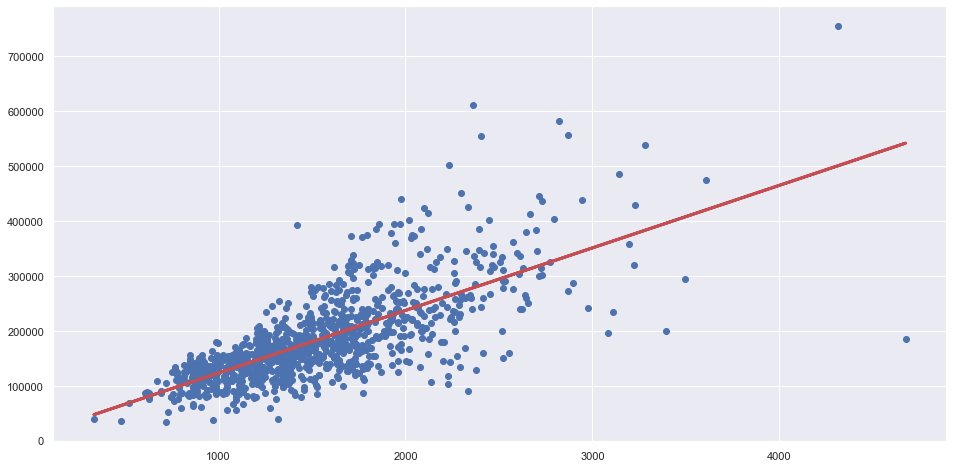

In [68]:
# Formula for the Regression line
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
#plt.show()

#### Predict `SalePrice` for the train dataset
Predict `SalePrice` for the test dataset `houseGrLivArea_train` using Linear Regression model, and plot the predictions.

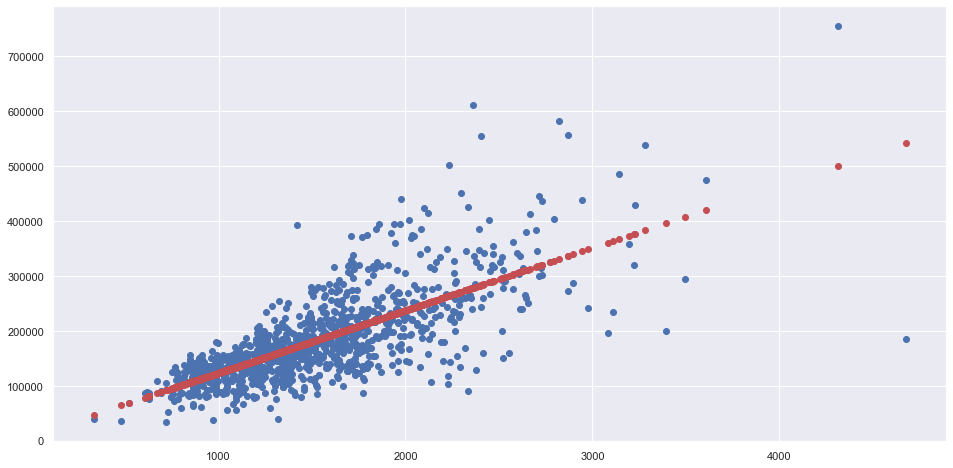

In [23]:
# Predict SalePrice values corresponding to GrLivArea Train
houseSalePrice_train_pred = linreg.predict(houseGrLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.scatter(houseGrLivArea_train, houseSalePrice_train_pred, color = "r")
plt.show()

#### Predict `SalePrice` for the test dataset
**f)** Predict `SalePrice` for the test dataset `houseGrLivArea_test` using Linear Regression model, and plot the predictions.

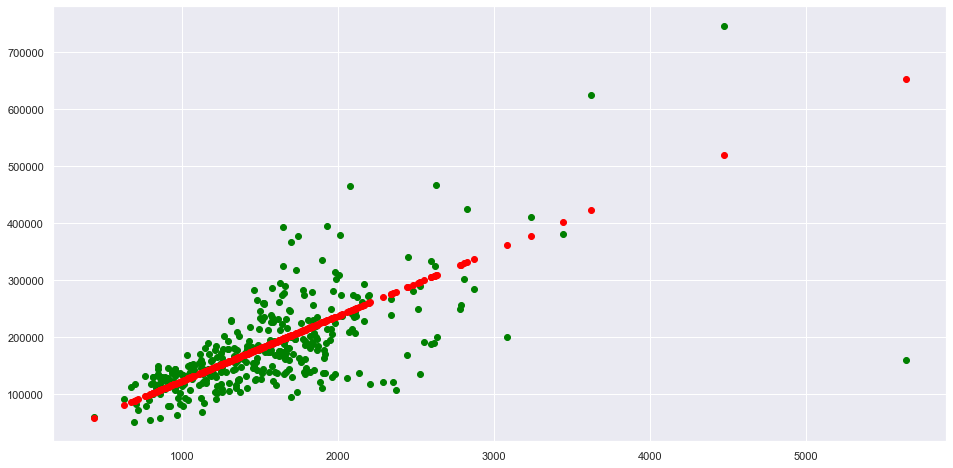

In [17]:
# Predict SalePrice values corresponding to GrLivArea Test
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Model
**g)** Check how good the predictions are on the Train Set.<br>
Metrics : Explained Variance and Mean Squared Error.

In [73]:
# Explained Variance (R^2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 3735705165.951247
Root Mean Squared Error (RMSE) 	: 61120.41529596512


In [74]:
# Find and compute Explained Variance [19]
# Explained Variance (R^2)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.40117720006925806
Mean Squared Error (MSE) 	: 5827711275.733227
Root Mean Squared Error (RMSE) 	: 76339.44770387867


In [ ]:
# Try with Log[dataset] steps a-g

***
## Problem 2 : Predicting SalePrice using other Variables 
Perform all the above steps on `SalePrice` against each of the variables `LotArea`, `TotalBsmtSF`, `GarageArea` to perform individual Linear Regressions. 
***


### Predicting SalePrice using LotArea

Intercept 	: b =  [160963.95370929]
Coefficients 	: a =  [[1.91881242]]


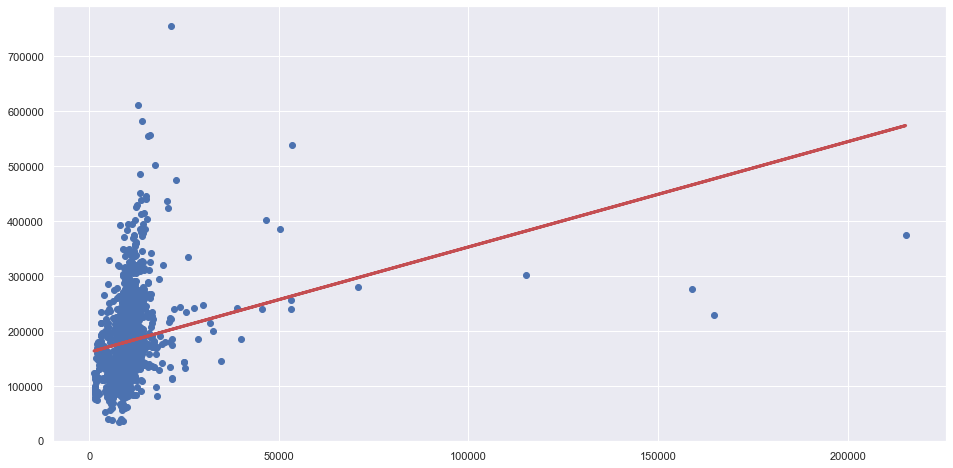

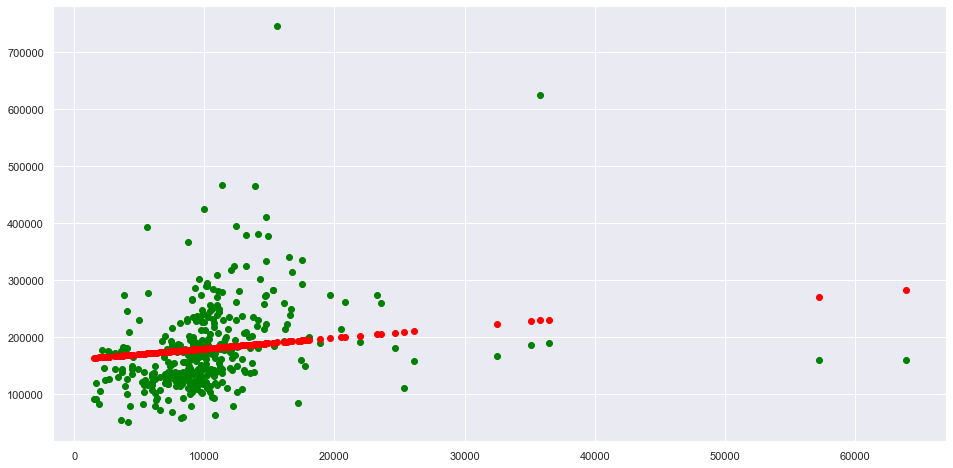

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06996047063721678

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0661786844889618


In [37]:
# Extract the Variables from the dataset
houseLotArea = pd.DataFrame(houseData['LotArea'])      #Predictor
houseSalePrice = pd.DataFrame(houseData['SalePrice'])  #Response

# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Partition the datasets in Train (1100 samples) and Test (360 samples) Sets
houseLotArea_train = pd.DataFrame(houseLotArea[:1100])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

houseLotArea_test = pd.DataFrame(houseLotArea[-360:])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])
 
# Train the Linear Regression model
linreg.fit(houseLotArea_train, houseSalePrice_train)  # .fit('predictor','response')

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = houseLotArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseLotArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)

# Predict SalePrice values corresponding to LotArea Test
houseSalePrice_test_pred = linreg.predict(houseLotArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseLotArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseLotArea_train, houseSalePrice_train))

# Explained Variance (R^2)
print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseLotArea_test, houseSalePrice_test))

### Predicting SalePrice using TotalBsmtSF

Intercept 	: b =  [54361.70161283]
Coefficients 	: a =  [[120.19979559]]


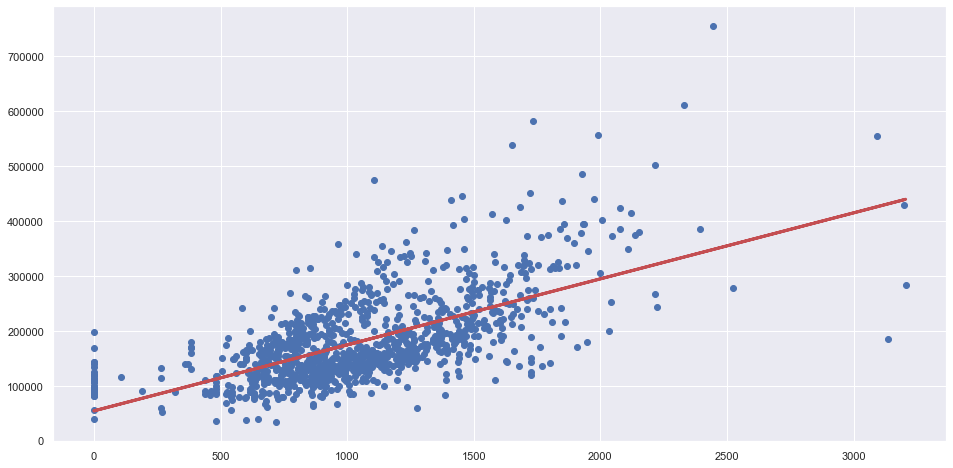

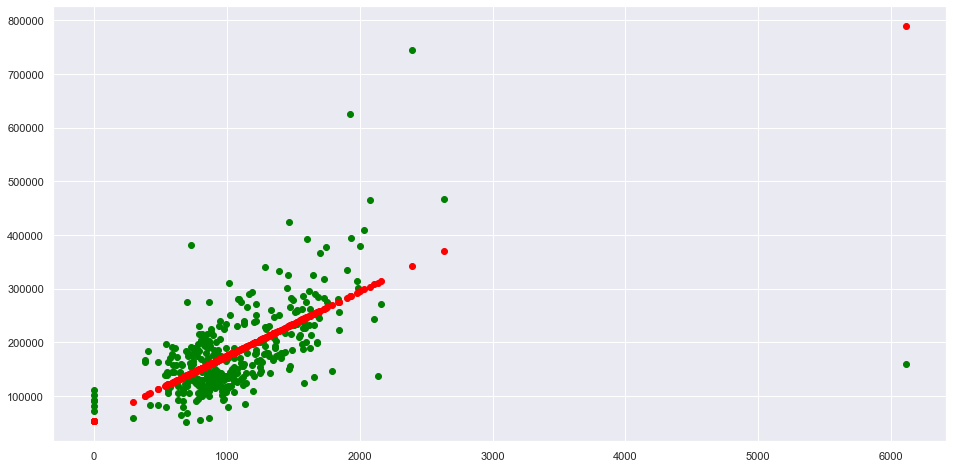

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4096515413342241

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.26305378699344206


In [36]:
# Extract the Variables from the dataset
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])  #Predictor
houseSalePrice = pd.DataFrame(houseData['SalePrice'])  #Response

# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Partition the datasets in Train (1100 samples) and Test (360 samples) Sets
houseTotalBsmtSF_train = pd.DataFrame(houseTotalBsmtSF[:1100])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

houseTotalBsmtSF_test = pd.DataFrame(houseTotalBsmtSF[-360:])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])
 
# Train the Linear Regression model
linreg.fit(houseTotalBsmtSF_train, houseSalePrice_train)  # .fit('predictor','response')

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = houseTotalBsmtSF_train
regline_y = linreg.intercept_ + linreg.coef_ * houseTotalBsmtSF_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)

# Predict SalePrice values corresponding to TotalBsmtSF Test
houseSalePrice_test_pred = linreg.predict(houseTotalBsmtSF_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test, color = "green")
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseTotalBsmtSF_train, houseSalePrice_train))

# Explained Variance (R^2)
print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseTotalBsmtSF_test, houseSalePrice_test))

### Predicting SalePrice using GarageArea

Intercept 	: b =  [67131.98072434]
Coefficients 	: a =  [[241.42776434]]


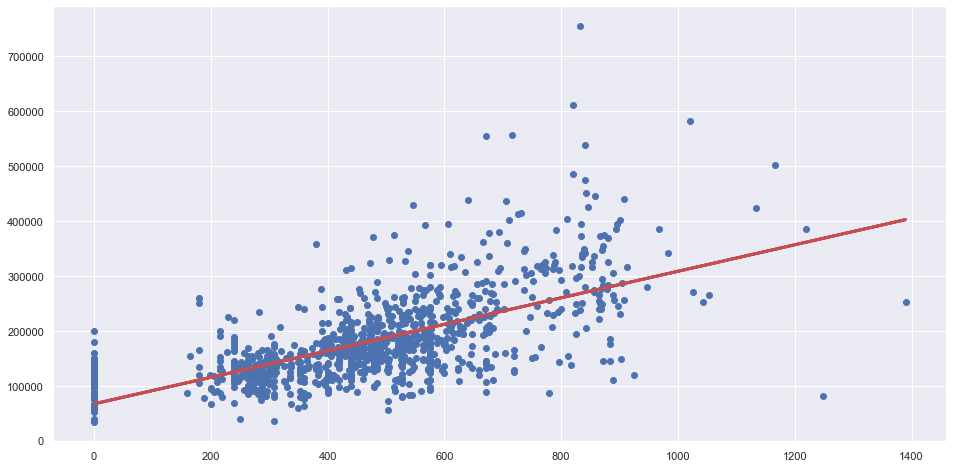

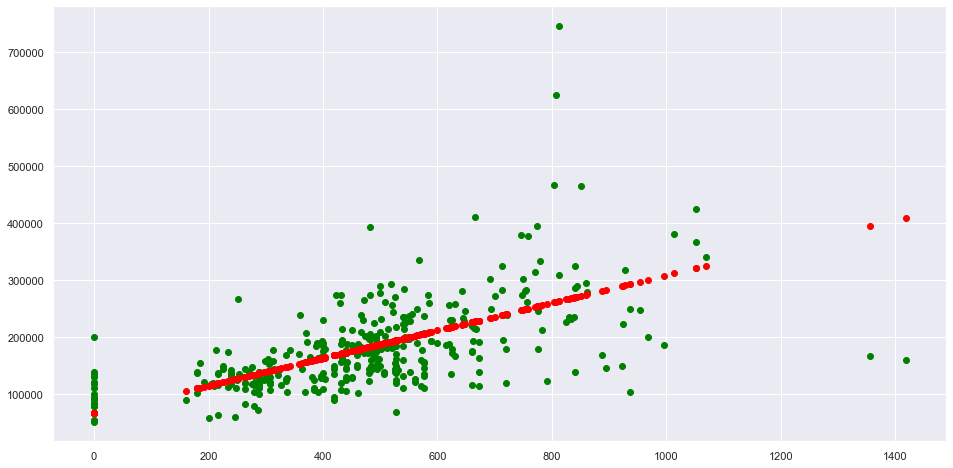

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4052658994757936

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33415894889143827


In [35]:
# Extract the Variables from the dataset
houseGarageArea = pd.DataFrame(houseData['GarageArea'])   #Predictor
houseSalePrice = pd.DataFrame(houseData['SalePrice'])  #Response

# Partition the datasets in Train (1100 samples) and Test (360 samples) Sets
houseGarageArea_train = pd.DataFrame(houseGarageArea[:1100])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

houseGarageArea_test = pd.DataFrame(houseGarageArea[-360:])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

 
# Train the Linear Regression model
linreg.fit(houseGarageArea_train, houseSalePrice_train)  # .fit('predictor','response')

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = houseGarageArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGarageArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGarageArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)

# Predict SalePrice values corresponding to GarageArea Test
houseSalePrice_test_pred = linreg.predict(houseGarageArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGarageArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGarageArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGarageArea_train, houseSalePrice_train))

# Explained Variance (R^2)
print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGarageArea_test, houseSalePrice_test))

***
## Predicting SalePrice using other Variables (Multi-Variate Linear Regression)
We will start by setting up a Multi-Variate Linear Regression problem.<br>

Response Variable : SalePrice<br>
Predictor Feature : GrLivArea, LotArea, TotalBsmtSF, GarageArea<br>

>Regression Model : SalePrice =  𝑎1   ×  GrLivArea +  𝑎2   ×  LotArea +  𝑎3   ×  TotalBsmtSF +  𝑎4   ×  GarageArea +  𝑏 

Extract the variables and the associated data as a Pandas DataFrame.

In [40]:
X = pd.DataFrame(houseData[['GrLivArea','LotArea','TotalBsmtSF','GarageArea']])
y = pd.DataFrame(houseData['SalePrice'])

Set up the regression problem with Train and Test datasets.

In [41]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1095, 1) (1095, 4)
Test Set  : (365, 1) (365, 4)


#### Basic Exploration
Perform basic statistical exploration and visualization on the Train Set.

In [42]:
# Summary Statistics for Response
y_train.describe()

,SalePrice
count,1095.000000
mean,179706.266667
std,79555.150125
min,34900.000000
25%,129500.000000
50%,161750.000000
75%,211000.000000
max,755000.000000


In [43]:
# Summary Statistics for Predictors
X_train.describe()

,GrLivArea,LotArea,TotalBsmtSF,GarageArea
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,1509.178082,10583.469406,1057.627397,473.264840
std,531.115315,10679.792526,432.573947,213.357129
min,334.000000,1300.000000,0.000000,0.000000
25%,1123.500000,7667.500000,796.000000,336.000000
50%,1466.000000,9473.000000,992.000000,478.000000
75%,1763.000000,11446.000000,1296.500000,576.000000
max,5642.000000,215245.000000,6110.000000,1418.000000


<AxesSubplot:>

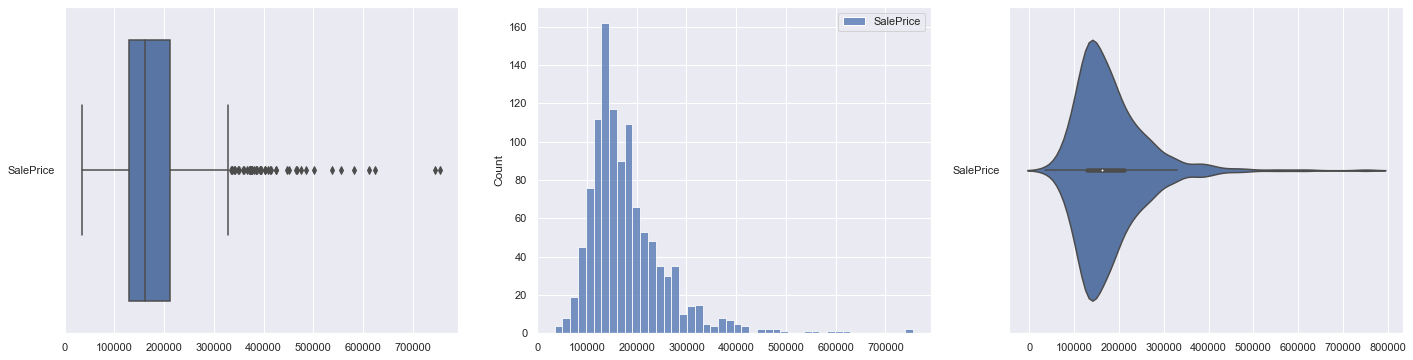

In [45]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

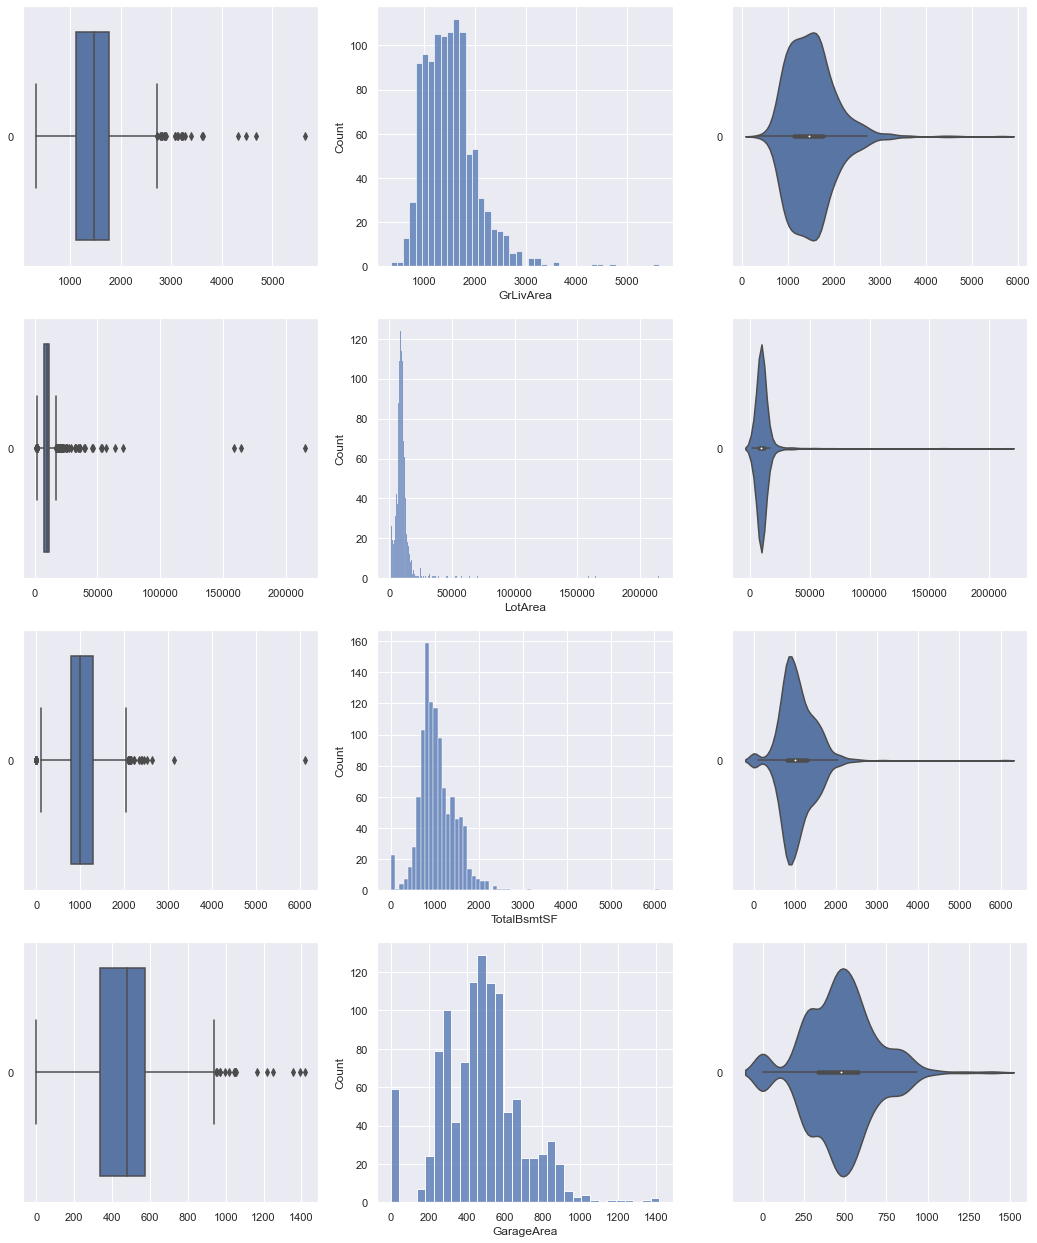

In [49]:
# Draw the distribution of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 22))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = X_train[var], ax = axes[count, 1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count, 2])
    count += 1

<AxesSubplot:>

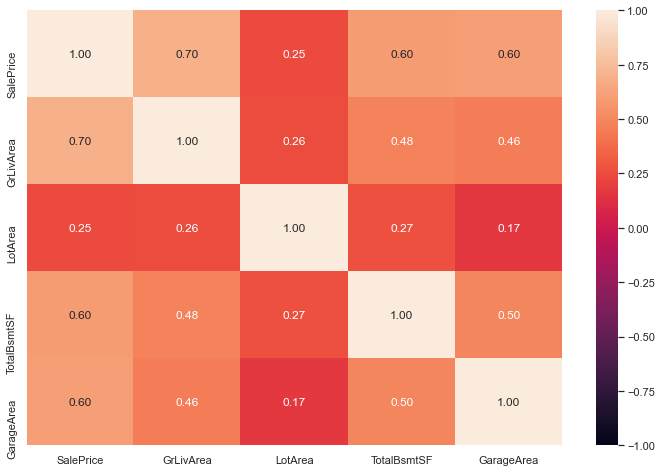

In [50]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

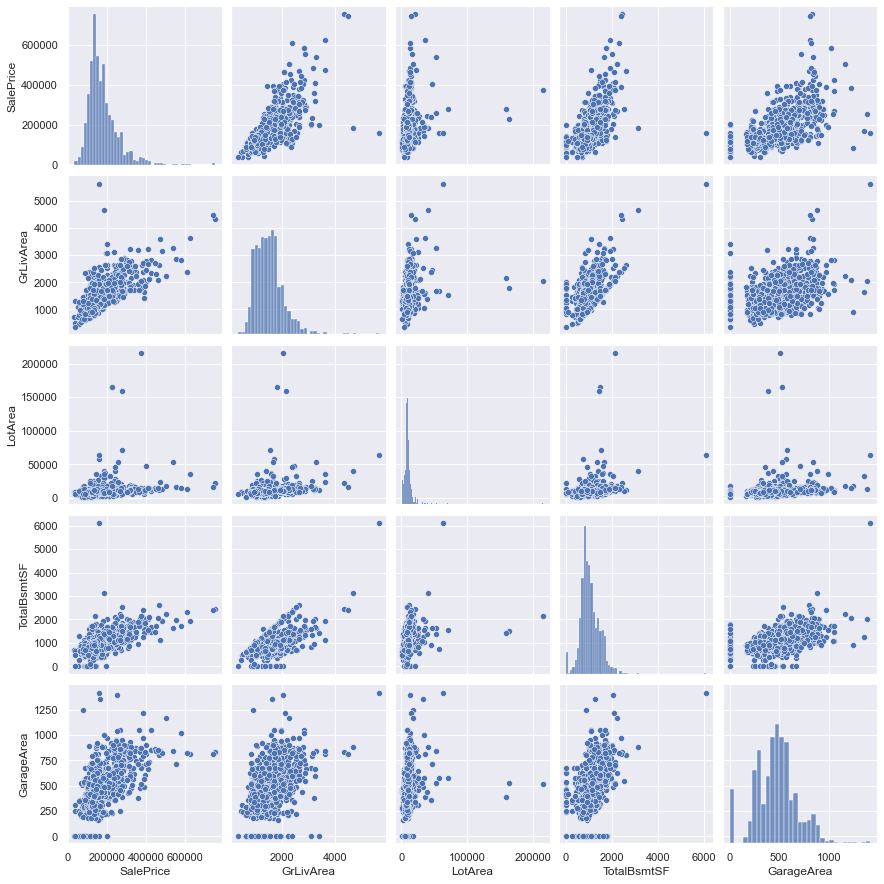

In [51]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

#### Linear Regression using Scikit-Learn

In [52]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-18588.82135511]
Coefficients of Regression 	: a =  [[ 67.55581583   0.14517838  43.25832148 103.64947998]]



,Predictors,Coefficients
0,GrLivArea,67.555816
1,LotArea,0.145178
2,TotalBsmtSF,43.258321
3,GarageArea,103.649480


Response Variable : **SalePrice**<br>
Predictor Feature : **GrLivArea, LotArea, TotalBsmtSF, GarageArea**<br>

>Regression Model : SalePrice = 𝑎1 × GrLivArea + 𝑎2 × LotArea + 𝑎3 × TotalBsmtSF + 𝑎4 × GarageArea + 𝑏

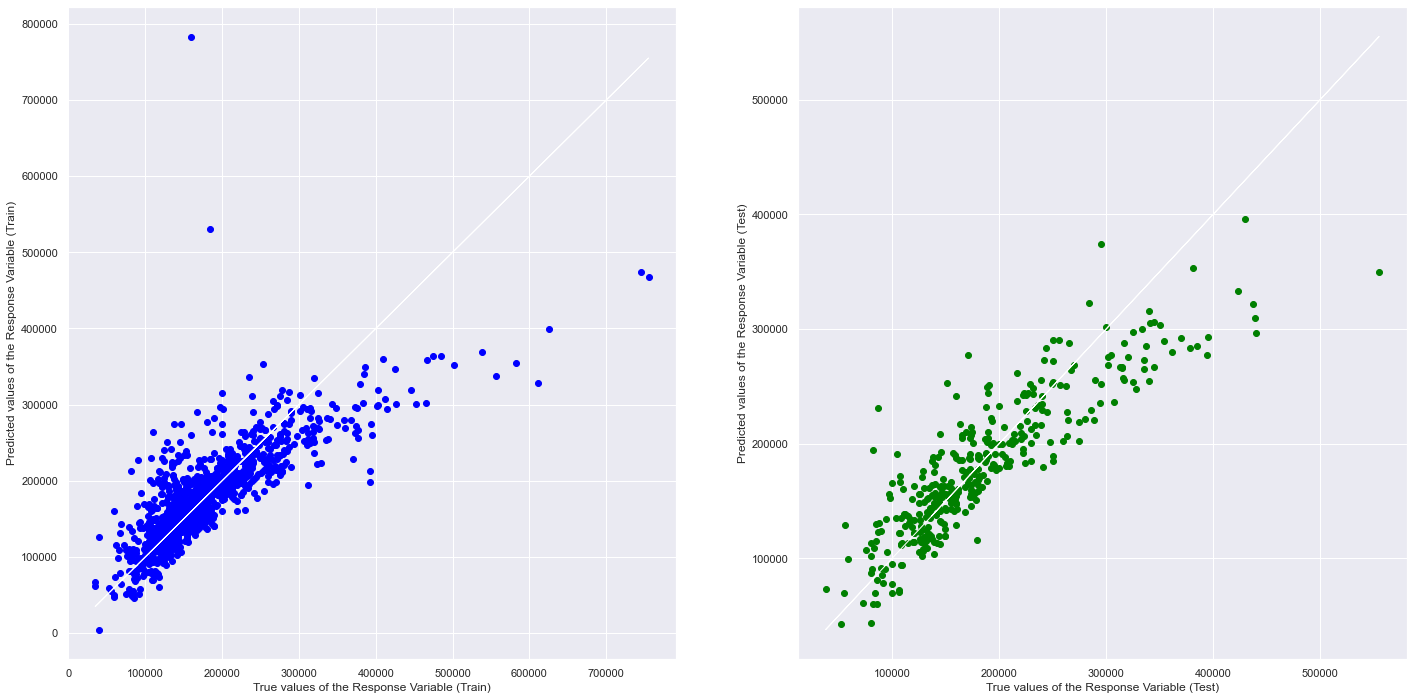

In [55]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Model

In [56]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6268153869828164
Mean Squared Error (MSE) 	: 2359736612.3639092

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7663879846682382
Mean Squared Error (MSE) 	: 1457672573.0394936

